In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
style.use('seaborn-ticks')
sns.set(color_codes=True)

# Tabulation

In [ ]:
url = 'https://api.covid19india.org/states_daily.json'

In [ ]:
import urllib.request

In [ ]:
urllib.request.urlretrieve(url, 'data.json');

In [ ]:
covid_data = pd.read_json('data.json')

In [ ]:
covid_data

states_daily
0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
..                                                 ...
319  {'an': '2', 'ap': '428', 'ar': '6', 'as': '274...
320  {'an': '0', 'ap': '12', 'ar': '0', 'as': '1', ...
321  {'an': '7', 'ap': '793', 'ar': '5', 'as': '302...
322  {'an': '0', 'ap': '324', 'ar': '1', 'as': '245...
323  {'an': '0', 'ap': '11', 'ar': '0', 'as': '0', ...

[324 rows x 1 columns]

In [ ]:
import json

In [ ]:
with open('data.json') as f:
    data = json.load(f)

In [ ]:
data = data['states_daily']

In [ ]:
covid_data = pd.json_normalize(data)

In [ ]:
covid_data

an   ap ar   as   br  ch   ct  ...    tn  tr     tt    un   up   ut   wb
0    0    1  0    0    0   0    0  ...     1   0     81     0   12    0    0
1    0    0  0    0    0   0    0  ...     0   0      9     0    4    0    0
2    0    0  0    0    0   0    0  ...     0   0      2     0    0    0    0
3    0    0  0    0    0   0    0  ...     0   0     27     0    1    0    0
4    0    0  0    0    0   0    0  ...     0   0      4     0    0    0    0
..  ..  ... ..  ...  ...  ..  ...  ...   ...  ..    ...   ...  ...  ...  ...
319  2  428  6  274  226   1  125  ...  1443   8  11628     0  593  106  404
320  0   12  0    1    4   0    0  ...    54   0    384     0   11    1   10
321  7  793  5  302  394   3  101  ...  3949  34  18339  -554  681    8  624
322  0  324  1  245  218  13   88  ...  2212   6  13497     0  698   93  526
323  0   11  0    0    1   0    0  ...    62   0    417     0   12    1   14

[324 rows x 41 columns]

In [ ]:
df = covid_data

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df = df[df.status == 'Confirmed']

In [ ]:
df.drop('status', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df

an   ap  ar   as   br ch   ct  ...    tn  tr     tt    un   up  ut   wb
date                                       ...                                     
2020-03-14   0    1   0    0    0  0    0  ...     1   0     81     0   12   0    0
2020-03-15   0    0   0    0    0  0    0  ...     0   0     27     0    1   0    0
2020-03-16   0    0   0    0    0  0    0  ...     0   0     15     0    0   1    0
2020-03-17   0    0   0    0    0  0    0  ...     0   0     11     0    2   0    1
2020-03-18   0    0   0    0    0  0    0  ...     1   0     37     0    2   1    0
...         ..  ...  ..  ...  ... ..  ...  ...   ...  ..    ...   ...  ...  ..  ...
2020-06-25   2  553  12  364  215  3   37  ...  3509  32  18205   352  636  68  475
2020-06-26  14  605   2  273  190  2   89  ...  3645  35  18255  -370  750  34  542
2020-06-27   0  796   3  246  302  3   65  ...  3713   9  20142  -100  606  66  521
2020-06-28  11  813   5  327  244  3   84  ...  3940  12  19610  -184  598  32  572
2020-06-29   7  793   5  302  394  3  101  ...  3949  34  18339  -554  681   8  624

[108 rows x 39 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2020-03-14 to 2020-06-29
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      108 non-null    object
 1   ap      108 non-null    object
 2   ar      108 non-null    object
 3   as      108 non-null    object
 4   br      108 non-null    object
 5   ch      108 non-null    object
 6   ct      108 non-null    object
 7   dd      108 non-null    object
 8   dl      108 non-null    object
 9   dn      108 non-null    object
 10  ga      108 non-null    object
 11  gj      108 non-null    object
 12  hp      108 non-null    object
 13  hr      108 non-null    object
 14  jh      108 non-null    object
 15  jk      108 non-null    object
 16  ka      108 non-null    object
 17  kl      108 non-null    object
 18  la      108 non-null    object
 19  ld      108 non-null    object
 20  mh      108 non-null    object
 21  ml      108 non-null    object
 22  mn     

In [ ]:
df.tn

date
2020-03-14       1
2020-03-15       0
2020-03-16       0
2020-03-17       0
2020-03-18       1
              ... 
2020-06-25    3509
2020-06-26    3645
2020-06-27    3713
2020-06-28    3940
2020-06-29    3949
Name: tn, Length: 108, dtype: object

In [ ]:
pd.to_numeric(df.tn)

date
2020-03-14       1
2020-03-15       0
2020-03-16       0
2020-03-17       0
2020-03-18       1
              ... 
2020-06-25    3509
2020-06-26    3645
2020-06-27    3713
2020-06-28    3940
2020-06-29    3949
Name: tn, Length: 108, dtype: int64

In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2020-03-14 to 2020-06-29
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      108 non-null    int64
 1   ap      108 non-null    int64
 2   ar      108 non-null    int64
 3   as      108 non-null    int64
 4   br      108 non-null    int64
 5   ch      108 non-null    int64
 6   ct      108 non-null    int64
 7   dd      108 non-null    int64
 8   dl      108 non-null    int64
 9   dn      108 non-null    int64
 10  ga      108 non-null    int64
 11  gj      108 non-null    int64
 12  hp      108 non-null    int64
 13  hr      108 non-null    int64
 14  jh      108 non-null    int64
 15  jk      108 non-null    int64
 16  ka      108 non-null    int64
 17  kl      108 non-null    int64
 18  la      108 non-null    int64
 19  ld      108 non-null    int64
 20  mh      108 non-null    int64
 21  ml      108 non-null    int64
 22  mn      108 non-null    int64
 

In [ ]:
df.tail(7)

an   ap  ar   as   br  ch   ct  ...    tn  tr     tt   un   up   ut   wb
date                                        ...                                     
2020-06-23   2  462  10  203  157   7   83  ...  2516  23  15656  183  571  133  370
2020-06-24   6  497   2  226  223   2   34  ...  2865   0  16868  126  664   88  445
2020-06-25   2  553  12  364  215   3   37  ...  3509  32  18205  352  636   68  475
2020-06-26  14  605   2  273  190   2   89  ...  3645  35  18255 -370  750   34  542
2020-06-27   0  796   3  246  302   3   65  ...  3713   9  20142 -100  606   66  521
2020-06-28  11  813   5  327  244   3   84  ...  3940  12  19610 -184  598   32  572
2020-06-29   7  793   5  302  394   3  101  ...  3949  34  18339 -554  681    8  624

[7 rows x 39 columns]

## Styling tabulation

In [ ]:
df = df.tail(7)

In [ ]:
df.style

In [ ]:
def colour_red_negative(x):
    color = 'red' if x < 0 else 'white'
    return 'color: ' + color

In [ ]:
df.style.applymap(colour_red_negative)

In [ ]:
df.drop('un', axis=1, inplace=True)

In [ ]:
df.style.applymap(colour_red_negative)

In [ ]:
df.style.highlight_max(color='red')

In [ ]:
df.drop(['dd', 'ld'], axis=1,inplace=True)

In [ ]:
df.style.highlight_max(color='red').highlight_min(color='green')

In [ ]:
df.drop('tt', axis=1, inplace=True)

In [ ]:
def bold_max_value(x):
    is_max = (x == x.max())
    return ['font-weight: bold' if y else '' for y in is_max]

In [ ]:
df.style.apply(bold_max_value)

In [ ]:
df.style.apply(bold_max_value).highlight_min(color='green')

In [ ]:
df.style.apply(bold_max_value).highlight_min(color='green', axis=1)

In [ ]:
df.style.apply(bold_max_value).highlight_max(color='red', axis=1)

In [ ]:
df.style.background_gradient(cmap='Reds')

In [ ]:
df.style.background_gradient(cmap='Reds', axis=1)

In [ ]:
df.style.background_gradient(cmap='Reds', subset=['mh', 'tn', 'dl'])

In [ ]:
df.style.bar()

In [ ]:
df.style.bar(subset=['mh', 'tn', 'dl'])

In [ ]:
df[['mh', 'tn', 'dl']].style.bar()

In [ ]:
df[['mh', 'tn', 'dl']].style.bar(subset=['mh'], color='red').bar(subset=['tn'], color='orange').bar(subset=['dl'], color='yellow')

# Distribution of data

## Distribution of a single continuous variable

### Histogram

In [ ]:
x = np.random.normal(size=1000)

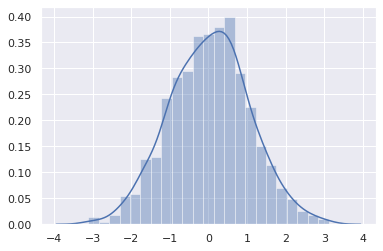

In [ ]:
sns.distplot(x);

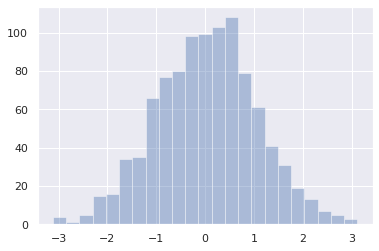

In [ ]:
sns.distplot(x, kde=False);

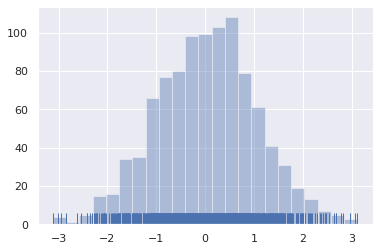

In [ ]:
sns.distplot(x, kde=False, rug=True);

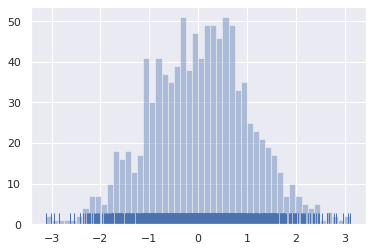

In [ ]:
sns.distplot(x, kde=False, rug=True, bins=50);

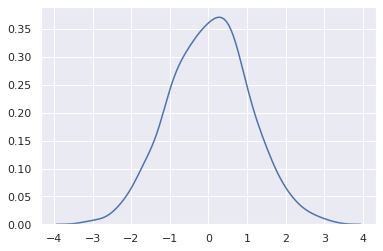

In [ ]:
sns.kdeplot(x);

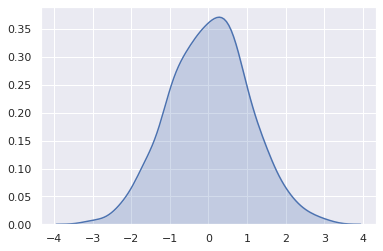

In [ ]:
sns.kdeplot(x, shade=True);

In [ ]:
y = np.random.uniform(size=1000)

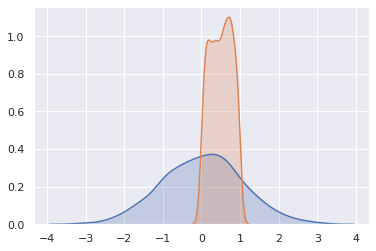

In [ ]:
sns.kdeplot(x,shade=True)
sns.kdeplot(y,shade=True);

In [ ]:
d = sns.load_dataset('diamonds')

In [ ]:
d

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


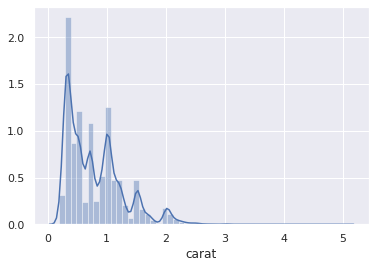

In [ ]:
sns.distplot(d.carat);

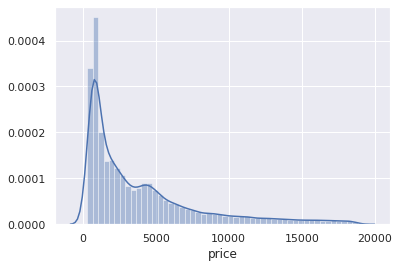

In [ ]:
sns.distplot(d.price);

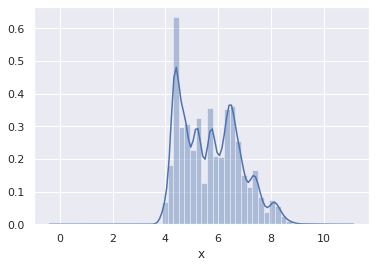

In [ ]:
sns.distplot(d.x);

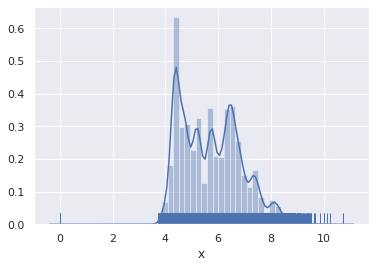

In [ ]:
sns.distplot(d.x, rug=True);

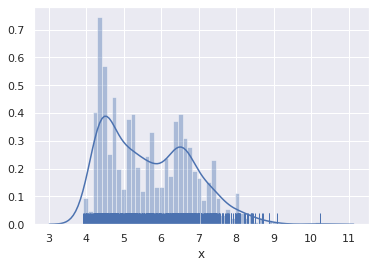

In [ ]:
sns.distplot(d.sample(1000).x, rug=True, bins=50);

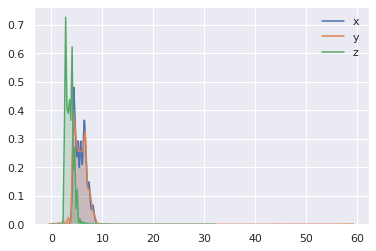

In [ ]:
sns.kdeplot(d.x, shade=True)
sns.kdeplot(d.y, shade=True)
sns.kdeplot(d.z, shade=True);

### Box plot

In [201]:
x = np.random.normal(size=1000)

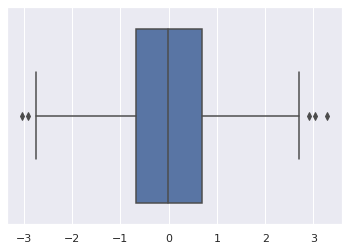

In [202]:
sns.boxplot(x)

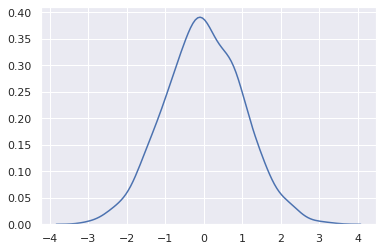

In [203]:
sns.kdeplot(x);

In [ ]:
x = np.random.uniform(size=1000)

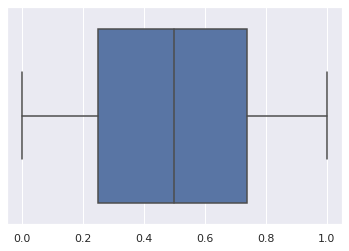

In [ ]:
sns.boxplot(x);

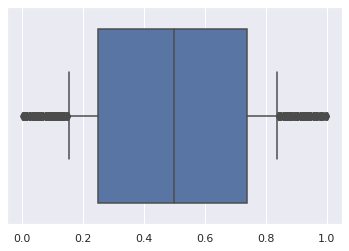

In [ ]:
sns.boxplot(x, whis=0.2)

In [ ]:
x = np.random.normal(size=1000)

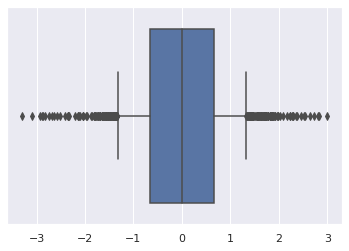

In [ ]:
sns.boxplot(x, whis=0.5);

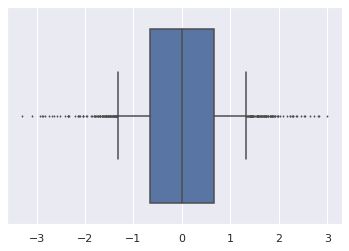

In [ ]:
sns.boxplot(x, whis=0.5, fliersize=1);

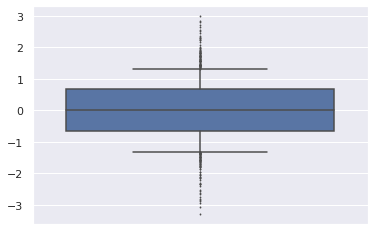

In [ ]:
sns.boxplot(x, whis=0.5, fliersize=1, orient='v');

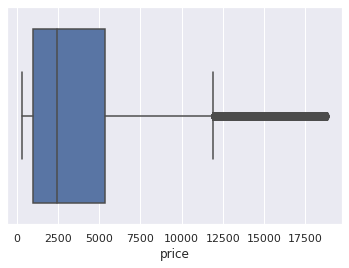

In [ ]:
sns.boxplot(d.price);

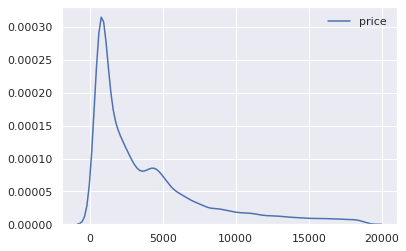

In [ ]:
sns.kdeplot(d.price);

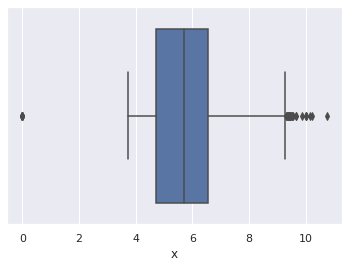

In [ ]:
sns.boxplot(d.x);

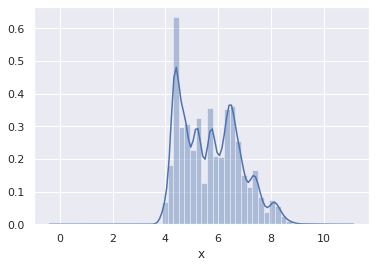

In [ ]:
sns.distplot(d.x);

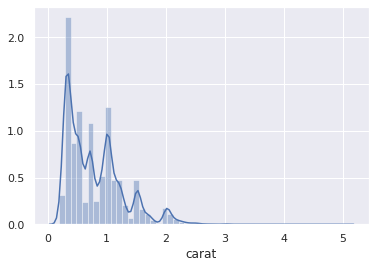

In [ ]:
sns.distplot(d.carat)

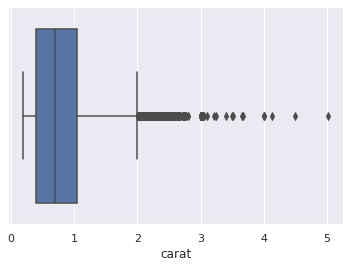

In [ ]:
sns.boxplot(d.carat)

### Boxen plots

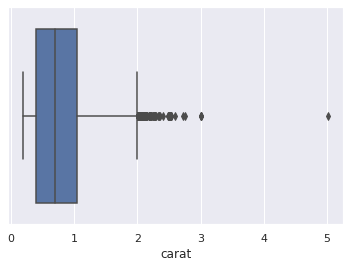

In [204]:
sns.boxplot(d.sample(5000).carat);

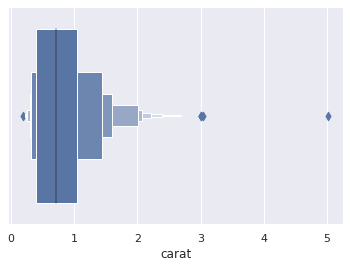

In [205]:
sns.boxenplot(d.sample(5000).carat);

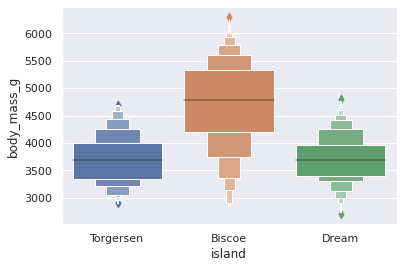

In [207]:
sns.boxenplot(x = 'island', y = 'body_mass_g', data = p);

## Distribution of a categorical variable

### Bar plots

In [ ]:
c = d.groupby('cut')['cut'].count()

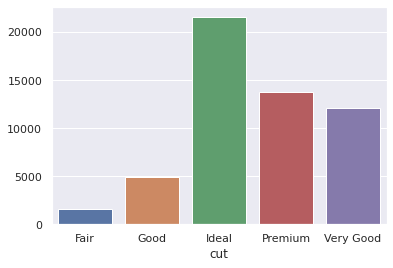

In [ ]:
sns.barplot(x=c.index, y=c.values)

In [ ]:
c = d.groupby('clarity')['clarity'].count()

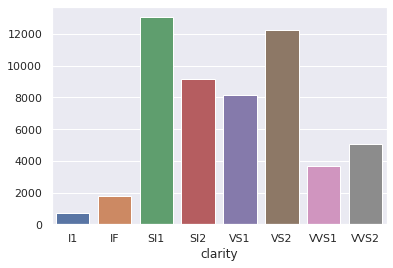

In [ ]:
sns.barplot(x=c.index, y=c.values);

In [ ]:
c = d.groupby('color')['color'].count()

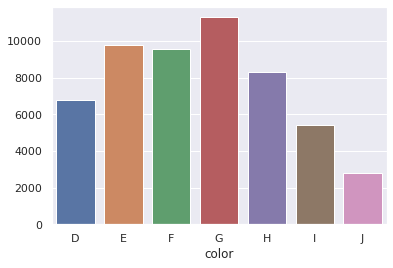

In [ ]:
sns.barplot(x=c.index, y=c.values);

## Joint distribution of two variables

### Jointplot

In [ ]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})

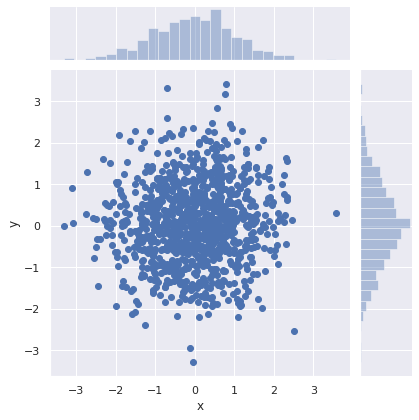

In [ ]:
sns.jointplot('x', 'y', data=df);

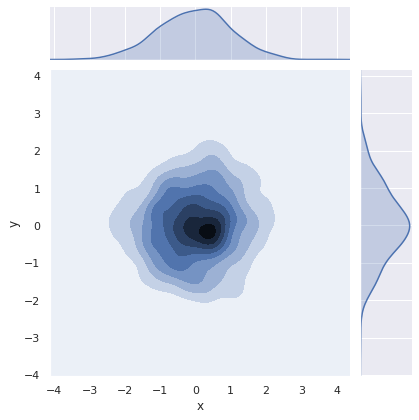

In [ ]:
sns.jointplot('x', 'y', data=df, kind='kde');

In [ ]:
x = np.random.normal(size=1000)
y = 3 * x + np.random.normal(size=1000)/5

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})

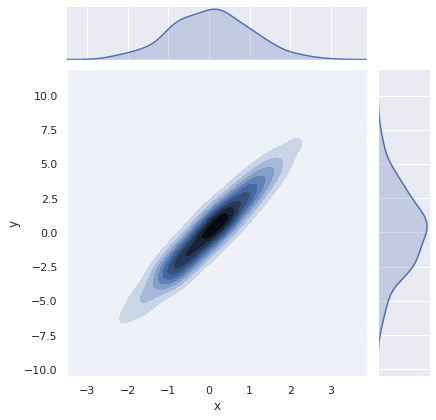

In [ ]:
sns.jointplot('x', 'y', data=df, kind='kde');

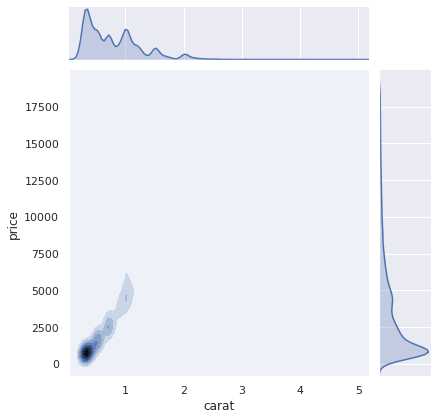

In [ ]:
sns.jointplot('carat', 'price', data=d, kind='kde');

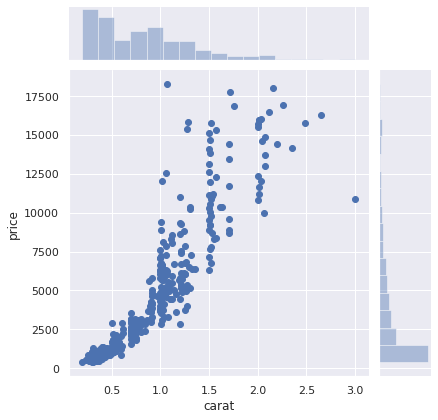

In [ ]:
sns.jointplot('carat', 'price', data=d.sample(500));

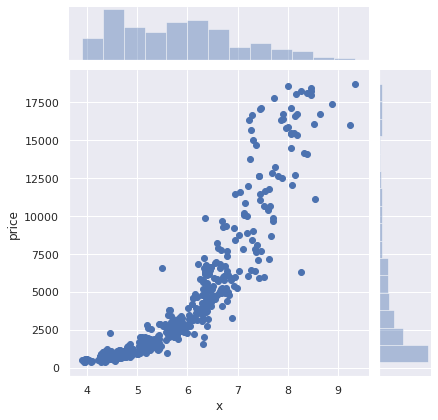

In [ ]:
sns.jointplot('x', 'price', data=d.sample(500));

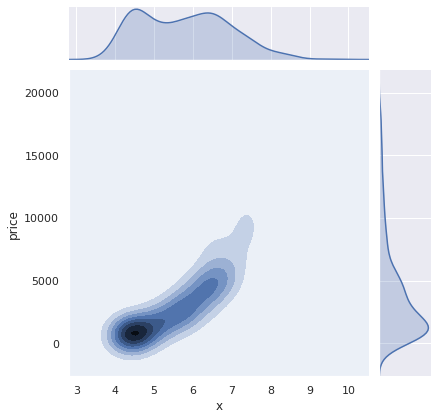

In [ ]:
sns.jointplot('x', 'price', data=d.sample(500), kind='kde');

### Swarm plot

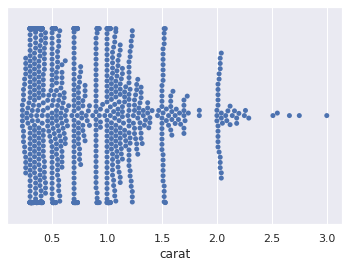

In [ ]:
sns.swarmplot(d.sample(1000).carat);

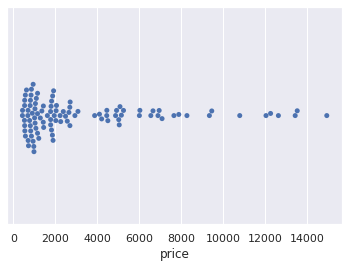

In [ ]:
sns.swarmplot(d.sample(100).price);

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


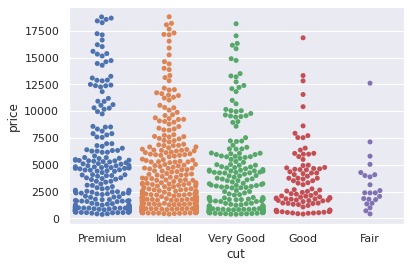

In [ ]:
sns.swarmplot(x='cut', y='price', data=d.sample(1000));

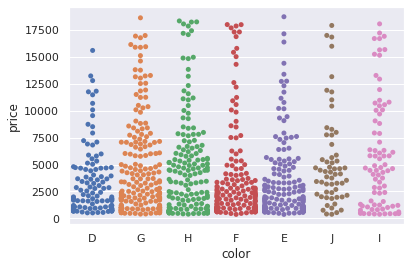

In [ ]:
sns.swarmplot(x='color', y='price', data=d.sample(1000));

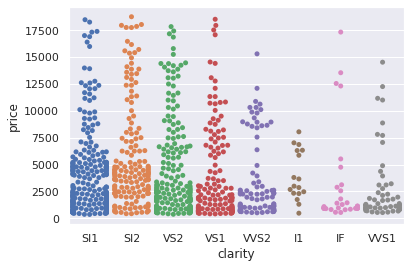

In [ ]:
sns.swarmplot(x='clarity', y='price', data=d.sample(1000));

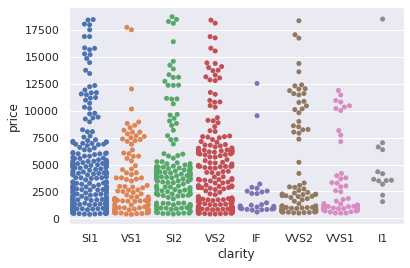

In [ ]:
sns.swarmplot(x='clarity', y='price', data=d.sample(1000));

In [ ]:
p = sns.load_dataset('penguins')

In [ ]:
p

species     island  ...  body_mass_g     sex
0    Adelie  Torgersen  ...       3750.0    MALE
1    Adelie  Torgersen  ...       3800.0  FEMALE
2    Adelie  Torgersen  ...       3250.0  FEMALE
3    Adelie  Torgersen  ...          NaN     NaN
4    Adelie  Torgersen  ...       3450.0  FEMALE
..      ...        ...  ...          ...     ...
339  Gentoo     Biscoe  ...          NaN     NaN
340  Gentoo     Biscoe  ...       4850.0  FEMALE
341  Gentoo     Biscoe  ...       5750.0    MALE
342  Gentoo     Biscoe  ...       5200.0  FEMALE
343  Gentoo     Biscoe  ...       5400.0    MALE

[344 rows x 7 columns]

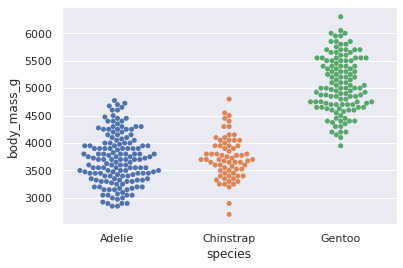

In [ ]:
sns.swarmplot(x='species', y='body_mass_g', data=p);

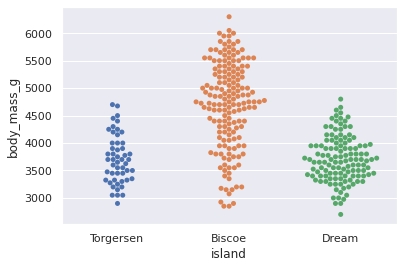

In [ ]:
sns.swarmplot(x='island', y='body_mass_g', data=p);

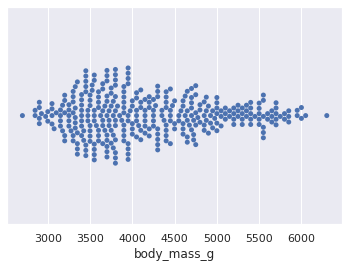

In [ ]:
sns.swarmplot(x='body_mass_g', data=p);

### Violin plot

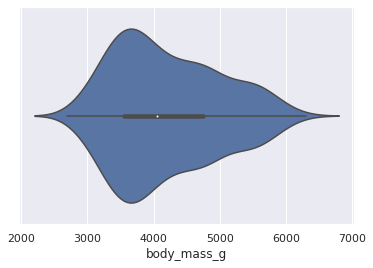

In [ ]:
sns.violinplot(x='body_mass_g', data=p);

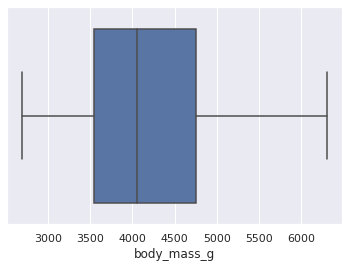

In [ ]:
sns.boxplot(x='body_mass_g', data=p);

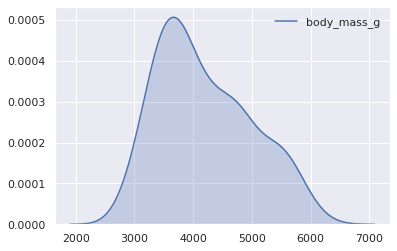

In [ ]:
sns.kdeplot(p.body_mass_g, shade=True);

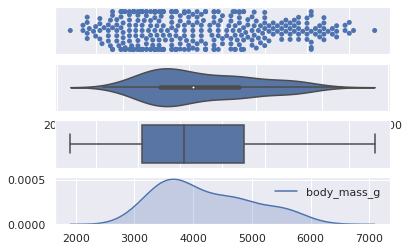

In [ ]:
fig, axs = plt.subplots(nrows=4)
sns.swarmplot(x='body_mass_g', data=p, ax=axs[0]);
sns.violinplot(x='body_mass_g', data=p, ax=axs[1]);
sns.boxplot(x='body_mass_g', data=p, ax=axs[2]);
sns.kdeplot(p.body_mass_g, shade=True, ax=axs[3]);

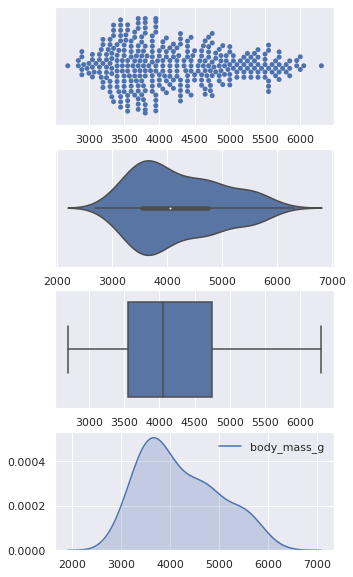

In [ ]:
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(5, 10);
sns.swarmplot(x='body_mass_g', data=p, ax=axs[0]);
sns.violinplot(x='body_mass_g', data=p, ax=axs[1]);
sns.boxplot(x='body_mass_g', data=p, ax=axs[2]);
sns.kdeplot(p.body_mass_g, shade=True, ax=axs[3]);

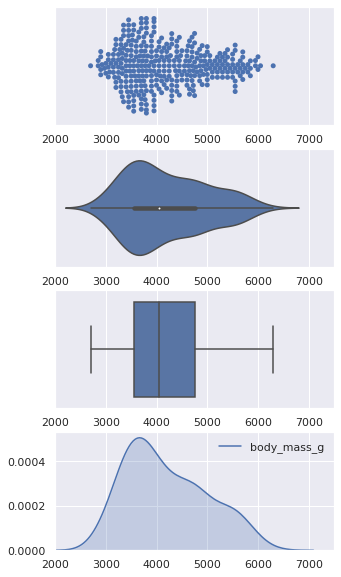

In [ ]:
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(5, 10);
p1 = sns.swarmplot(x='body_mass_g', data=p, ax=axs[0]);
p1.set(xlim=(2000, 7500));
p2 = sns.violinplot(x='body_mass_g', data=p, ax=axs[1]);
p2.set(xlim=(2000, 7500));
p3 = sns.boxplot(x='body_mass_g', data=p, ax=axs[2]);
p3.set(xlim=(2000, 7500));
p4 = sns.kdeplot(p.body_mass_g, shade=True, ax=axs[3]);
p4.set(xlim=(2000, 7500));

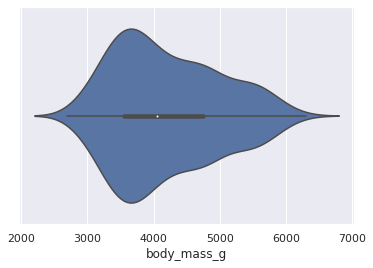

In [ ]:
sns.violinplot(x='body_mass_g', data=p);

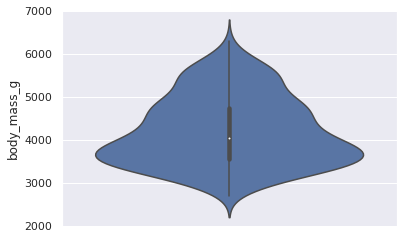

In [ ]:
sns.violinplot(x='body_mass_g', data=p, orient='v');

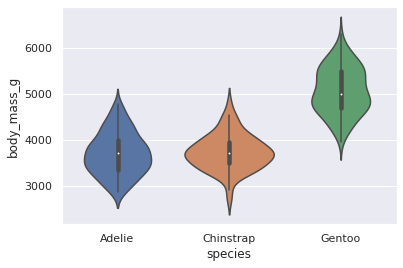

In [ ]:
sns.violinplot(x='species', y='body_mass_g', data=p);

In [ ]:
p.head()

species     island  culmen_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen              39.1  ...              181.0       3750.0    MALE
1  Adelie  Torgersen              39.5  ...              186.0       3800.0  FEMALE
2  Adelie  Torgersen              40.3  ...              195.0       3250.0  FEMALE
3  Adelie  Torgersen               NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen              36.7  ...              193.0       3450.0  FEMALE

[5 rows x 7 columns]

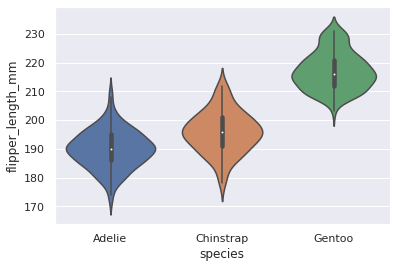

In [ ]:
sns.violinplot(x='species', y='flipper_length_mm', data=p);

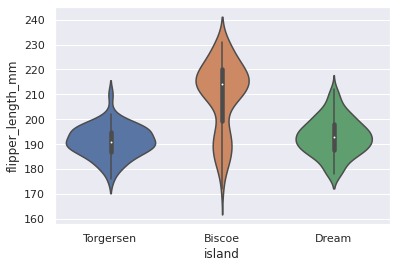

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p);

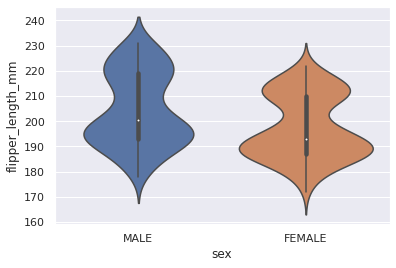

In [ ]:
sns.violinplot(x='sex', y='flipper_length_mm', data=p);

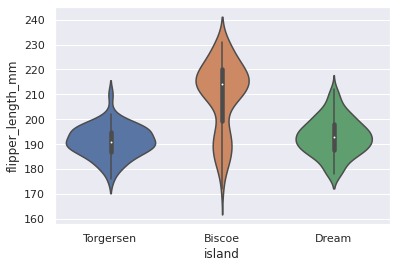

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p);

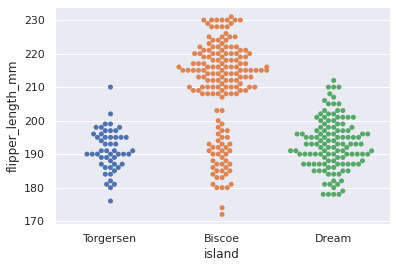

In [ ]:
sns.swarmplot(x='island', y='flipper_length_mm', data=p);

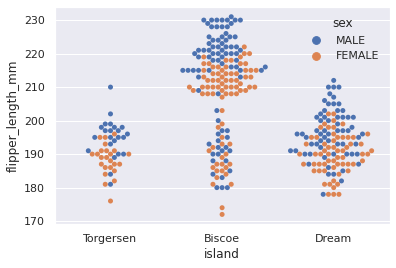

In [ ]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='sex', data=p);

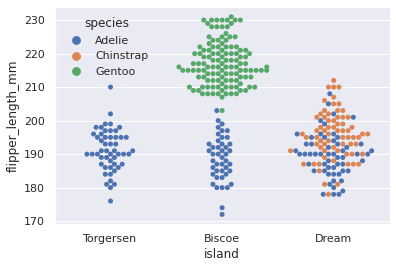

In [ ]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='species', data=p);

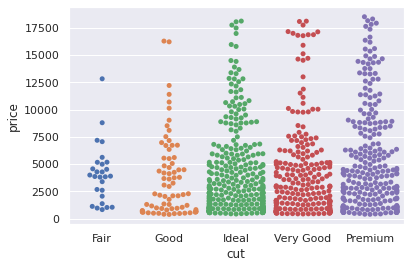

In [ ]:
sns.swarmplot(x='cut', y='price', data=d.sample(1000));

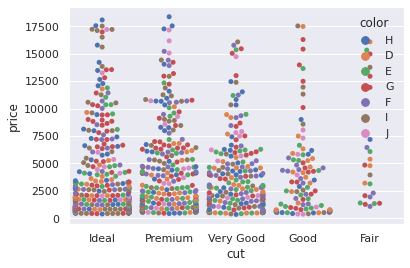

In [ ]:
sns.swarmplot(x='cut', y='price', hue='color', data=d.sample(1000));

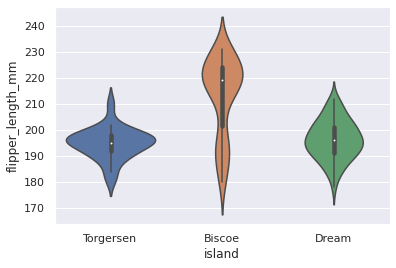

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p[p.sex=='MALE']);

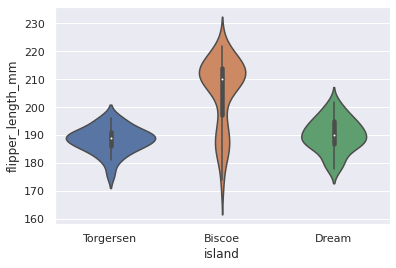

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p[p.sex=='FEMALE']);

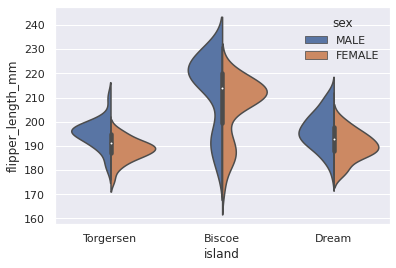

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', hue='sex', split=True, data=p);

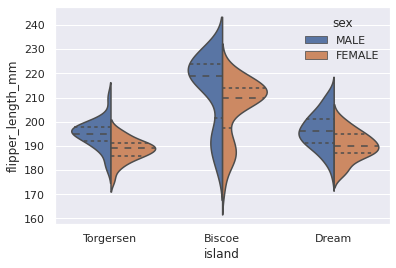

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='sex', split=True, inner='quartile', data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='species', split=True, inner='quartile', data=p);

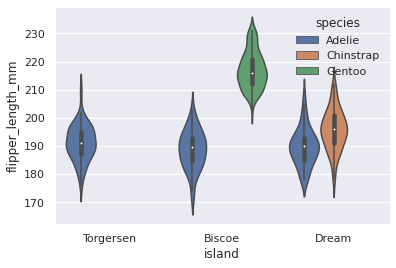

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='species', data=p);

In [ ]:
p['binary_species'] = p.species.apply(lambda x: 0 if x == 'Gentoo' else 1)

In [ ]:
p

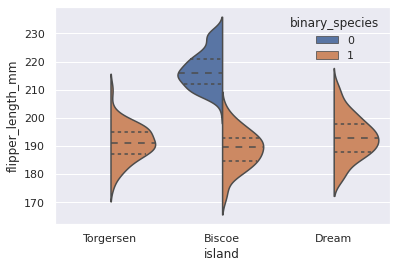

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='binary_species', split=True, inner='quartile', data=p);

In [ ]:
p['binary_species'] = p.species.apply(lambda x: 'Gentoo' if x == 'Gentoo' else 'Adelie | Chinstrap')

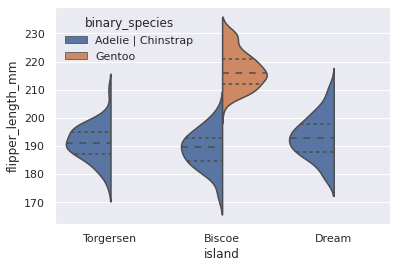

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='binary_species', split=True, inner='quartile', data=p);

### Faceted plotting

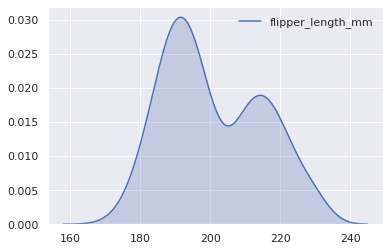

In [ ]:
sns.kdeplot(p.flipper_length_mm, shade=True);

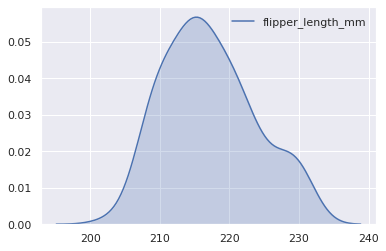

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);

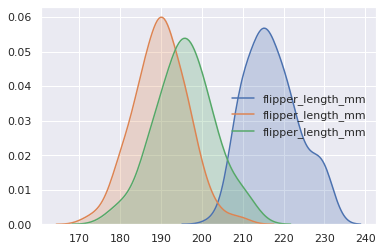

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True);

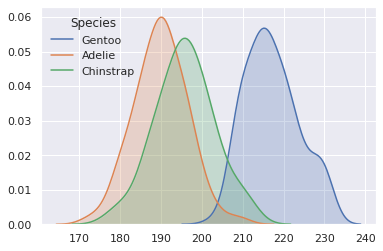

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True);
plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);


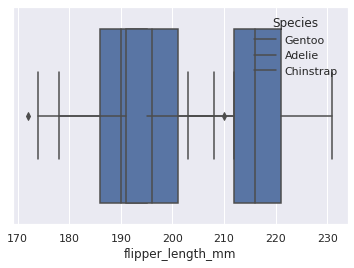

In [ ]:
sns.boxplot(p[p.species == 'Gentoo'].flipper_length_mm);
sns.boxplot(p[p.species == 'Adelie'].flipper_length_mm);
sns.boxplot(p[p.species == 'Chinstrap'].flipper_length_mm);
plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);


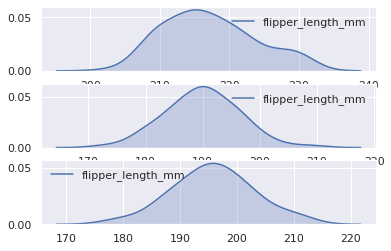

In [ ]:
fig, axs = plt.subplots(nrows=3);
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True, ax=axs[0]);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True, ax=axs[1]);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True, ax=axs[2]);
# plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);

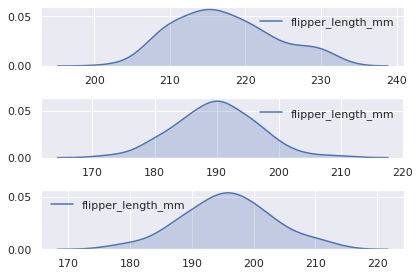

In [ ]:
fig, axs = plt.subplots(nrows=3);
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True, ax=axs[0]);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True, ax=axs[1]);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True, ax=axs[2]);
plt.tight_layout()
# plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);

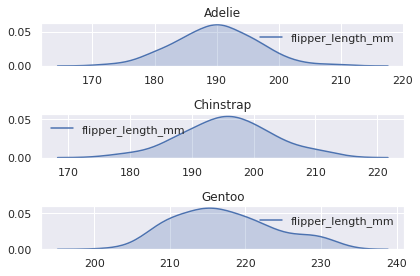

In [ ]:
column_name = 'species'
nrows = len(p[column_name].unique())
fig, axs = plt.subplots(nrows=nrows);
i = 0
for c_v in p[column_name].unique():
    pl = sns.kdeplot(p[p[column_name] == c_v].flipper_length_mm, 
                shade=True, ax=axs[i]);
    pl.set_title(c_v);
    i += 1
plt.tight_layout()

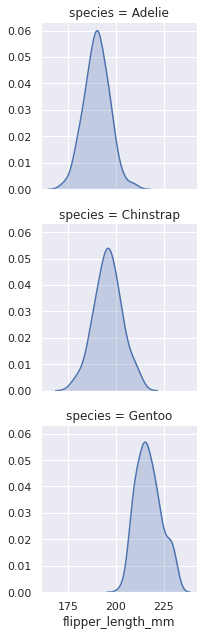

In [ ]:
g = sns.FacetGrid(p, row='species');
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

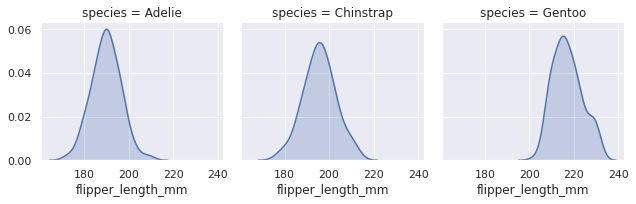

In [ ]:
g = sns.FacetGrid(p, col='species');
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

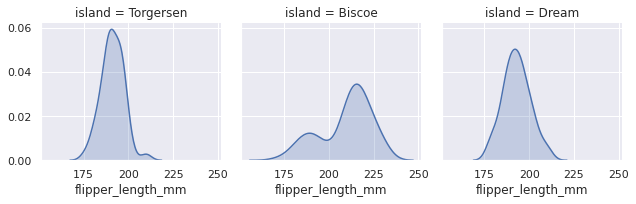

In [ ]:
g = sns.FacetGrid(p, col='island');
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

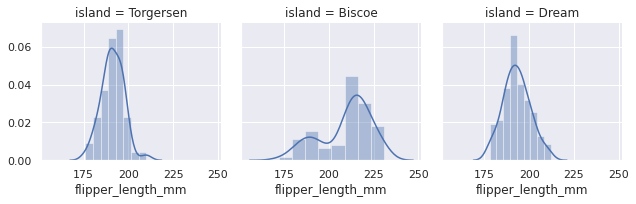

In [ ]:
g = sns.FacetGrid(p, col='island');
g.map(sns.distplot, 'flipper_length_mm');

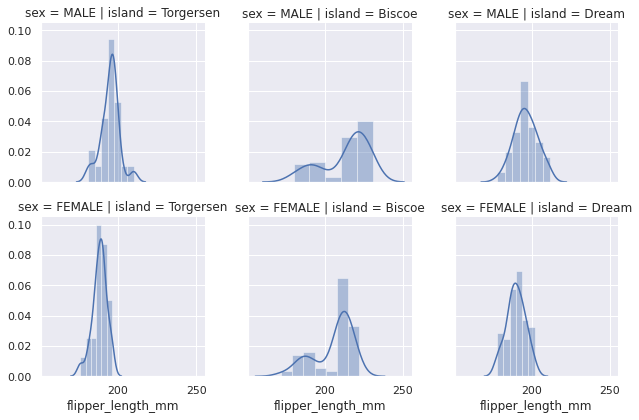

In [ ]:
g = sns.FacetGrid(p, col='island', row='sex');
g.map(sns.distplot, 'flipper_length_mm');

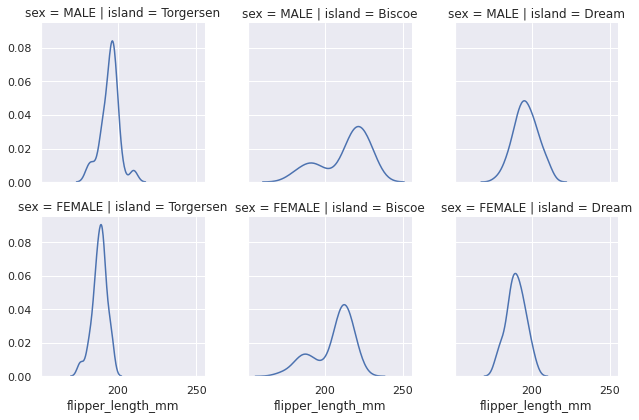

In [ ]:
g = sns.FacetGrid(p, col='island', row='sex');
g.map(sns.kdeplot, 'flipper_length_mm');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


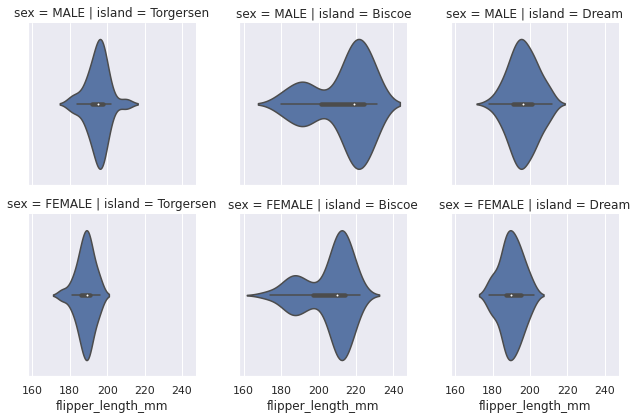

In [ ]:
g = sns.FacetGrid(p, col='island', row='sex');
g.map(sns.violinplot, 'flipper_length_mm');

### Pair plot

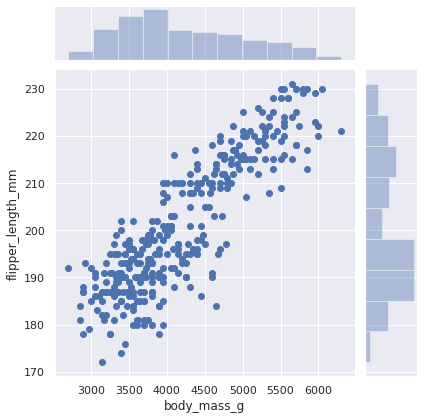

In [ ]:
sns.jointplot(p.body_mass_g, p.flipper_length_mm);

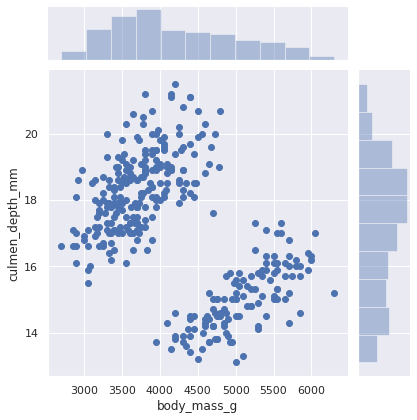

In [ ]:
sns.jointplot(p.body_mass_g, p.culmen_depth_mm);

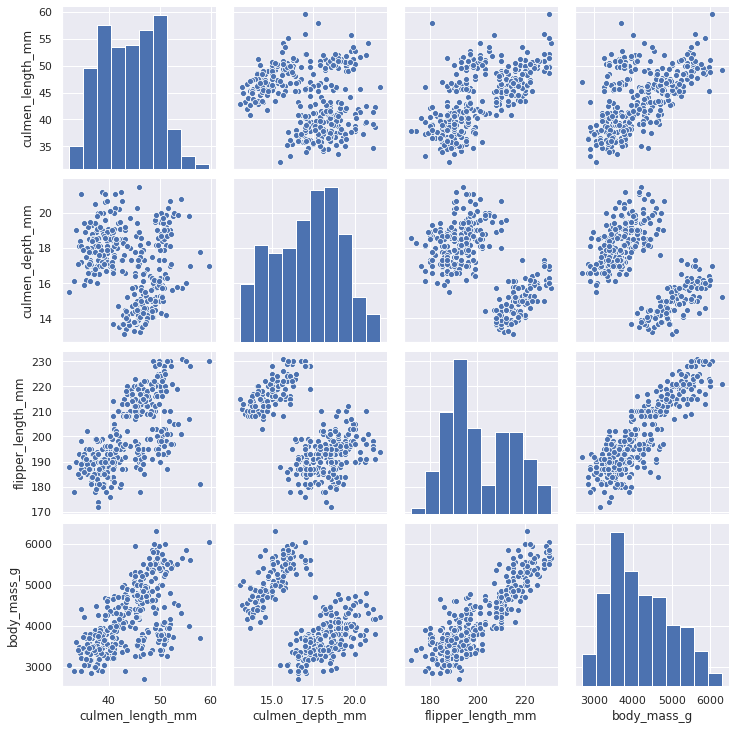

In [ ]:
sns.pairplot(p);

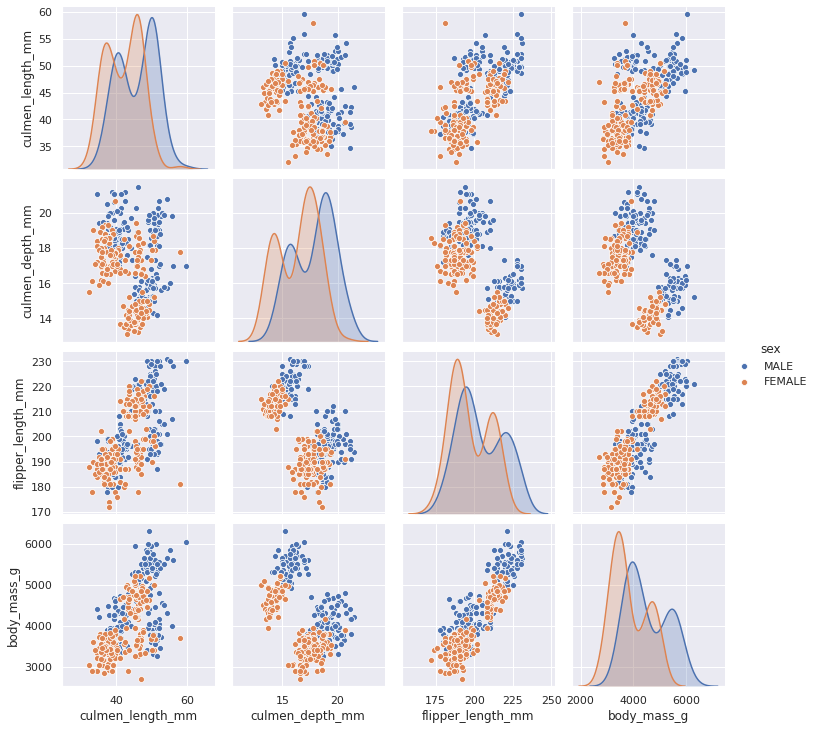

In [ ]:
sns.pairplot(p, hue='sex');

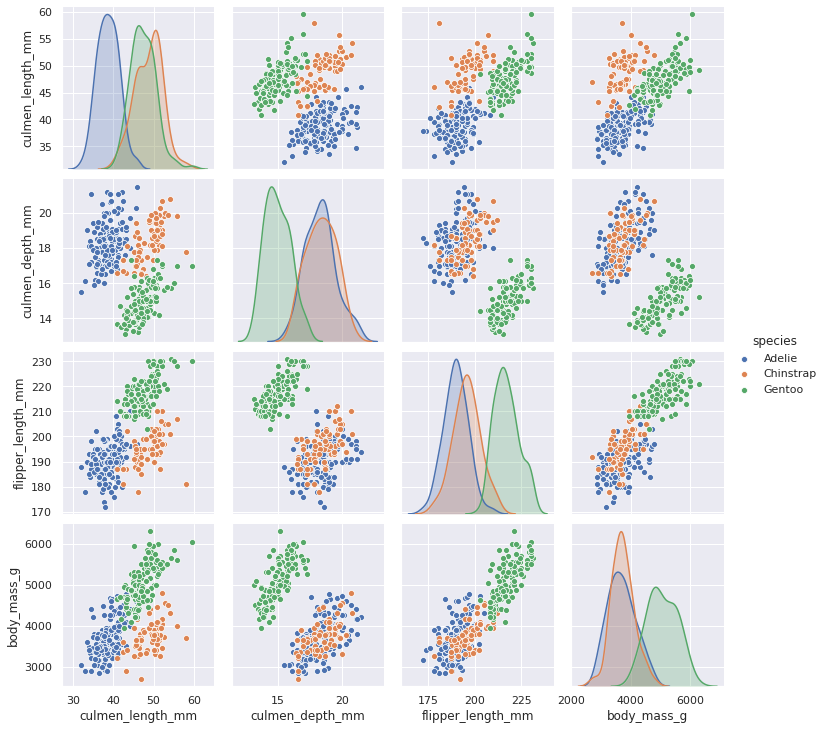

In [ ]:
sns.pairplot(p, hue='species');

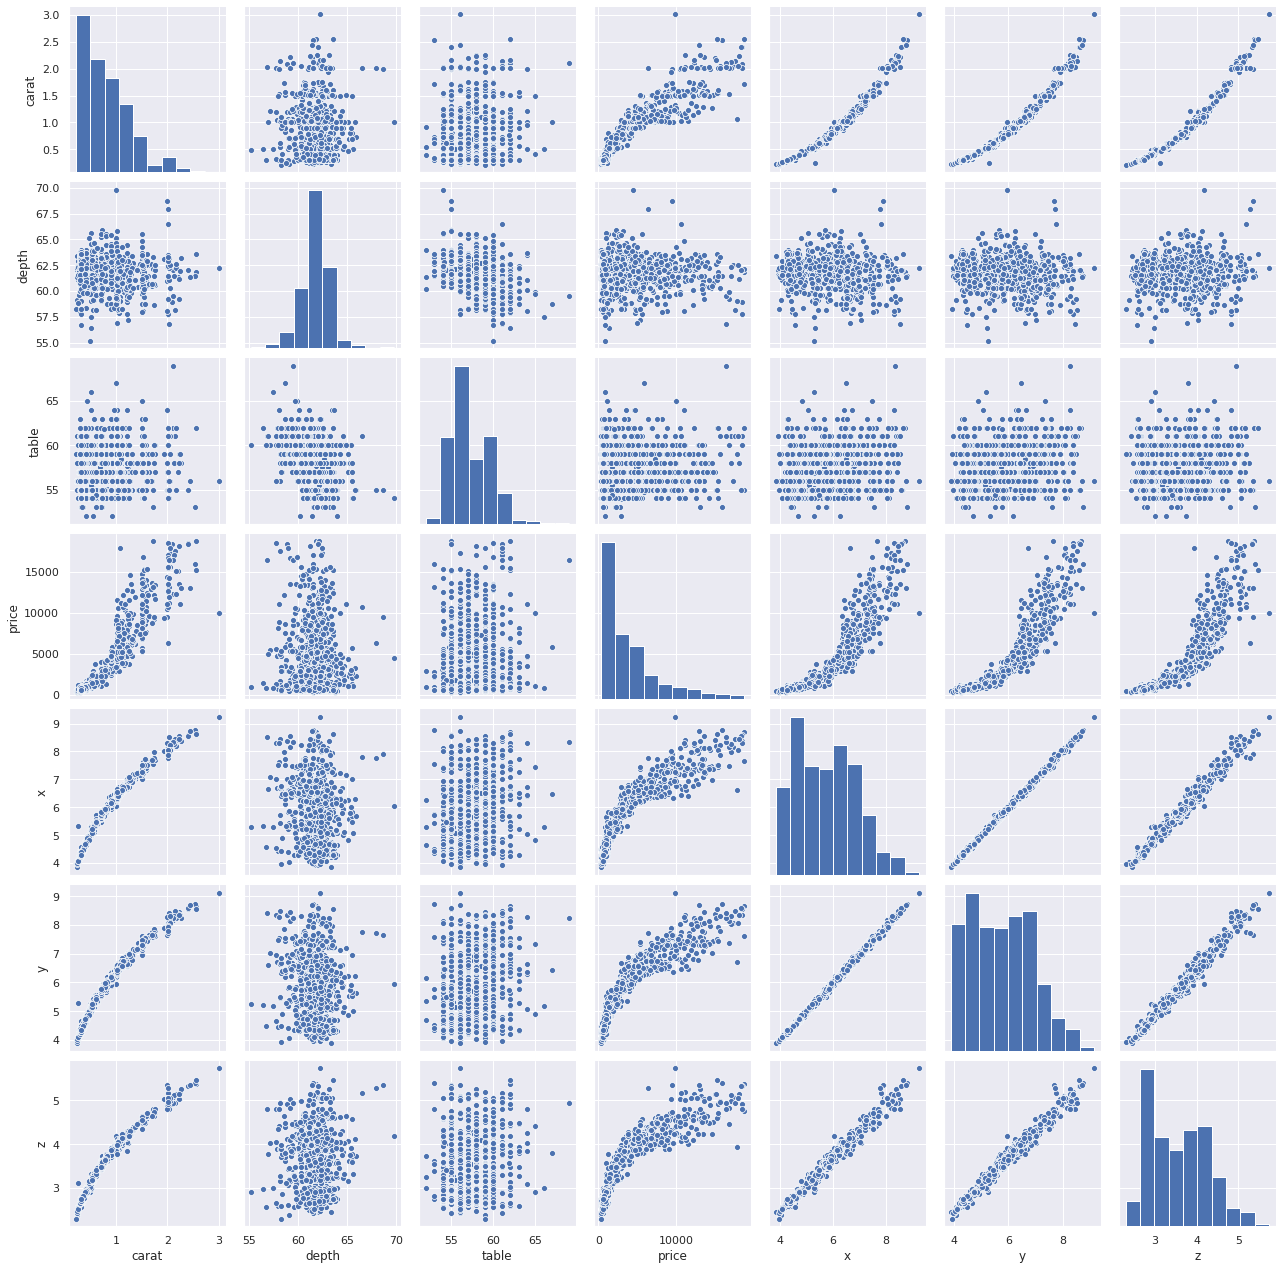

In [ ]:
sns.pairplot(d.sample(1000));

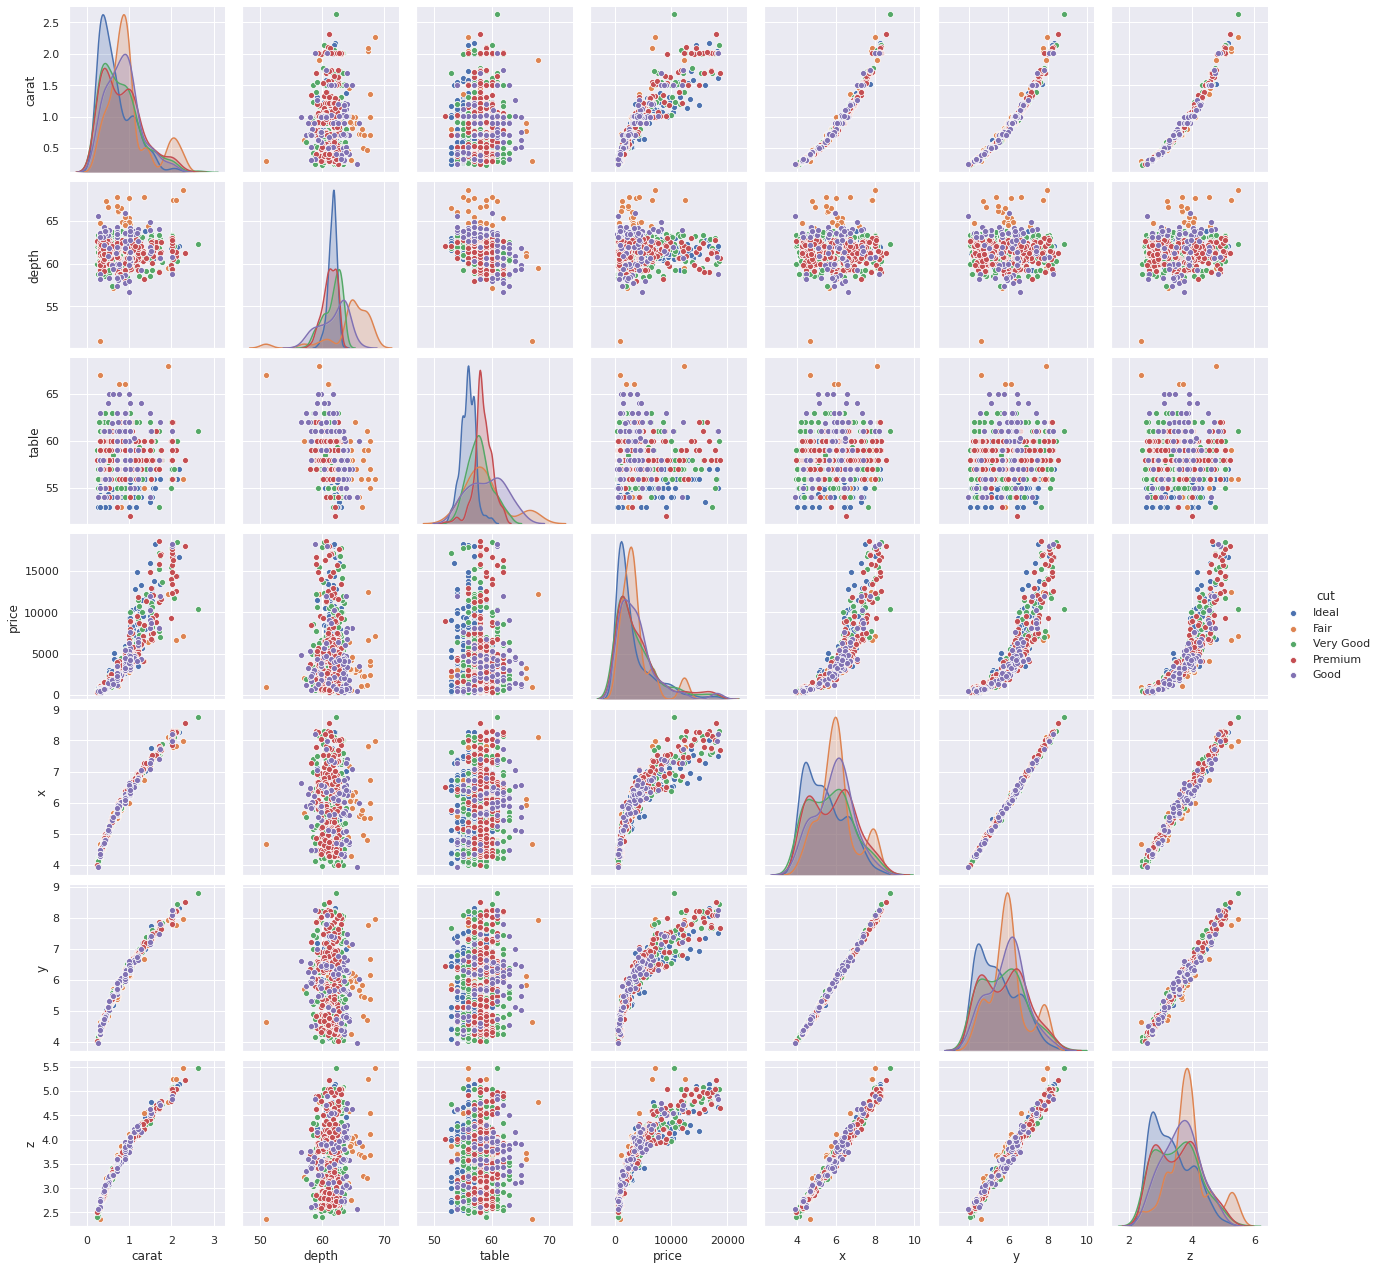

In [ ]:
sns.pairplot(d.sample(1000), hue='cut');

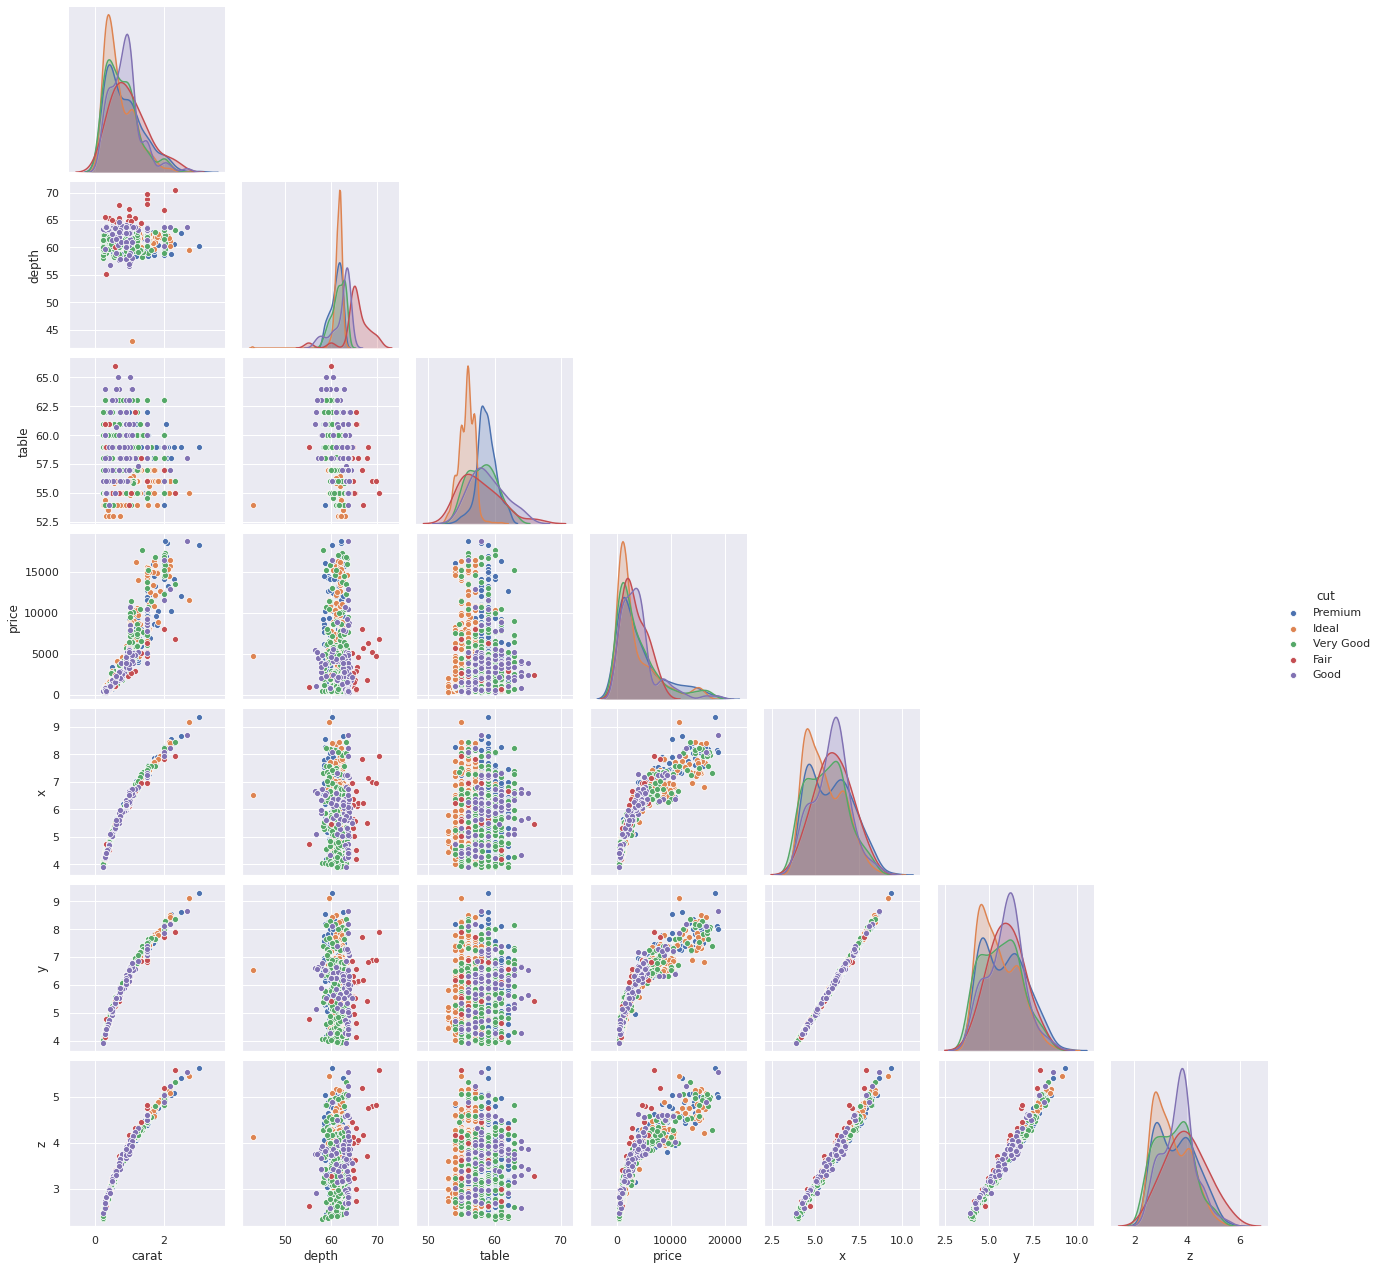

In [ ]:
sns.pairplot(d.sample(1000), hue='cut', corner=True);